<a href="https://colab.research.google.com/github/anaustinbeing/neural-networks-group-project/blob/main/neural_networks_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, explained_variance_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU, Dropout
import tensorflow.keras as keras
import tensorflow as tf

### Loading dataset

In [ ]:
df = pd.read_csv('Student data.csv', na_values='?')

In [ ]:
df.shape

(1437, 15)

In [ ]:
df

,First Term Gpa,Second Term Gpa,First Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0,1
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0,1
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0,1
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0,1
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,NaN,4,6,2,2,2,2,1.0,1.0,NaN,47.0,10.0,0
1433,4.360000,4.074074,1.0,2,6,1,1,1,1,2.0,4.0,NaN,NaN,10.0,1
1434,2.020833,2.450000,1.0,2,6,2,1,1,2,1.0,1.0,78.0,18.0,9.0,1
1435,4.021739,4.357143,NaN,4,6,2,1,2,1,1.0,2.0,NaN,46.0,8.0,1


### Preprocessing

In [ ]:
df.isna().sum()

First Term Gpa               17
Second Term Gpa             160
First Language              111
 Funding                      0
School                        0
FastTrack                     0
Coop                          0
 Residency                    0
Gender                        0
Previous Education            4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

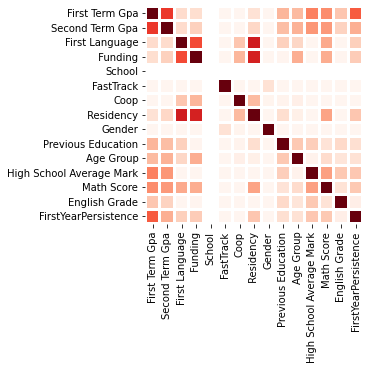

In [ ]:
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Reds')
plt.show()

We find that "School" and "Gender" has very low correlation with the target column, and hence we are dropping them.

In [ ]:
df = df.drop(['School', 'Gender'], axis=1)
df

,First Term Gpa,Second Term Gpa,First Language,Funding,FastTrack,Coop,Residency,Previous Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1.000000,2,2,1,1,1.0,1.0,59.000000,16.000000,7.0,1
1,2.500000,2.000000,3.000000,4,1,2,2,1.0,3.0,77.152738,32.557949,7.0,1
2,4.250000,3.923077,1.000000,1,2,1,1,2.0,3.0,92.000000,41.000000,9.0,1
3,3.020833,2.321429,3.000000,4,1,2,2,2.0,3.0,77.152738,32.557949,8.0,1
4,4.275000,4.326923,1.000000,2,1,1,1,2.0,3.0,97.000000,32.557949,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1.413043,0.000000,1.911011,4,2,2,2,1.0,1.0,77.152738,47.000000,10.0,0
1433,4.360000,4.074074,1.000000,2,1,1,1,2.0,4.0,77.152738,32.557949,10.0,1
1434,2.020833,2.450000,1.000000,2,2,1,1,1.0,1.0,78.000000,18.000000,9.0,1
1435,4.021739,4.357143,1.911011,4,2,1,2,1.0,2.0,77.152738,46.000000,8.0,1


In [ ]:
X, y = df.drop('FirstYearPersistence', axis=1), df['FirstYearPersistence']

In [ ]:
X.head(3)

,First Term Gpa,Second Term Gpa,First Language,Funding,FastTrack,Coop,Residency,Previous Education,Age Group,High School Average Mark,Math Score,English Grade
0,0.00,0.000000,1.0,2,2,1,1,1.0,1.0,59.000000,16.000000,7.0
1,2.50,2.000000,3.0,4,1,2,2,1.0,3.0,77.152738,32.557949,7.0
2,4.25,3.923077,1.0,1,2,1,1,2.0,3.0,92.000000,41.000000,9.0


In [ ]:
y.head(3)

0    1
1    1
2    1
Name: FirstYearPersistence, dtype: int64

In [ ]:
y.value_counts()

1    1138
0     299
Name: FirstYearPersistence, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
y.value_counts()

1    1138
0    1138
Name: FirstYearPersistence, dtype: int64

### Splitting to training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2162, 12), (114, 12), (2162,), (114,))

In [ ]:
y_train.head(3)

1229    1
78      1
2151    0
Name: FirstYearPersistence, dtype: int64

In [ ]:
X_train.head(3)

,First Term Gpa,Second Term Gpa,First Language,Funding,FastTrack,Coop,Residency,Previous Education,Age Group,High School Average Mark,Math Score,English Grade
1229,4.153846,4.021739,3.0,4,1,2,2,2.000000,3.0,77.152738,48.000000,8.0
78,3.521739,3.288462,3.0,4,1,2,2,1.000000,3.0,77.152738,32.557949,7.0
2151,0.000000,0.920678,1.0,2,2,2,1,0.326461,2.0,66.326461,26.673539,9.0


In [ ]:
np.unique(y_train)

array([0, 1])

### Building model

In [ ]:
# keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)

# def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
#   model = keras.models.Sequential()
#   model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#   # ANN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(3072,)))
#   model.add(layers.Flatten())
#   for _ in range(n_hidden):
#     model.add(layers.Dense(n_neurons, activation='relu'))
#   model.add(keras.layers.Dense(10))  # 10 neurons in the output layer.
#   print(model.summary())
#   # optimizer = keras.optimizers.adam(lr=learning_rate)
#   model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])
#   return model

def build_model(n_hidden=10, n_neurons=100, learning_rate=3e-3):
  model = Sequential()
  model.add(Dense(12, input_shape=(12,)))
  for _ in range(n_hidden):
      model.add(Dense(n_neurons, activation="relu"))
  model.add(Dense(2, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])
  return model

model = build_model()
# print(model.summary())

hist = model.fit(X_train, y_train, epochs=20, batch_size=2)

Epoch 1/20
1081/1081 [==============================] - 30s 27ms/step - loss: 0.6942 - accuracy: 0.5180
Epoch 2/20
1081/1081 [==============================] - 50s 46ms/step - loss: 0.6860 - accuracy: 0.5527
Epoch 3/20
1081/1081 [==============================] - 32s 30ms/step - loss: 0.6760 - accuracy: 0.5814
Epoch 4/20
1081/1081 [==============================] - 27s 25ms/step - loss: 0.6276 - accuracy: 0.6605
Epoch 5/20
1081/1081 [==============================] - 29s 26ms/step - loss: 0.5704 - accuracy: 0.7081
Epoch 6/20
1081/1081 [==============================] - 37s 35ms/step - loss: 0.5319 - accuracy: 0.7377
Epoch 7/20
1081/1081 [==============================] - 29s 27ms/step - loss: 0.5098 - accuracy: 0.7507
Epoch 8/20
1081/1081 [==============================] - 22s 20ms/step - loss: 0.5187 - accuracy: 0.7549
Epoch 9/20
1081/1081 [==============================] - 30s 28ms/step - loss: 0.4974 - accuracy: 0.7660
Epoch 10/20
1081/1081 [==============================] - 43s 40m

KeyError: ignored

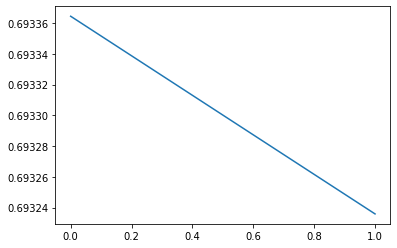

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 223ms/step - loss: 0.3964 - accuracy: 0.8158


[0.39644667506217957, 0.8157894611358643]

In [ ]:
X_test.shape

(114, 12)

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 1s 254ms/step


In [ ]:
y_pred

array([[0.29055578, 0.7094442 ],
       [0.8568508 , 0.14314915],
       [0.958392  , 0.04160801],
       [0.10047944, 0.8995206 ],
       [0.01902439, 0.98097557],
       [0.14563878, 0.8543612 ],
       [0.14188763, 0.85811234],
       [0.7775158 , 0.22248414],
       [0.04879938, 0.9512006 ],
       [0.87743545, 0.12256451],
       [0.34858617, 0.65141386],
       [0.05316634, 0.9468336 ],
       [0.93799657, 0.06200337],
       [0.95622325, 0.04377675],
       [0.95191836, 0.04808168],
       [0.05942663, 0.9405733 ],
       [0.8756042 , 0.1243958 ],
       [0.15480252, 0.84519756],
       [0.43637452, 0.5636255 ],
       [0.89741766, 0.10258238],
       [0.11821202, 0.881788  ],
       [0.54956985, 0.4504301 ],
       [0.60313123, 0.3968688 ],
       [0.28448987, 0.71551013],
       [0.88015974, 0.11984023],
       [0.3761693 , 0.6238306 ],
       [0.2453258 , 0.7546742 ],
       [0.7809617 , 0.21903826],
       [0.78752714, 0.21247278],
       [0.01898481, 0.98101526],
       [0.

In [ ]:
outputs = [np.argmax(x) for x in y_pred]

In [ ]:
(outputs == y_test).value_counts()

True     93
False    21
Name: FirstYearPersistence, dtype: int64

In [ ]:
model.save_weights('./checkpoints/my_checkpoint')

In [ ]:
model.save('./saved_model/')

In [ ]:
X_test.iloc[0].to_numpy()

array([ 2.8460731 ,  2.82017558,  1.        ,  2.        ,  2.        ,
        2.        ,  1.        ,  1.        ,  1.        , 66.        ,
       17.        ,  7.        ])